<a href="https://colab.research.google.com/github/yonghyunk1m/coding-notes/blob/master/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pytorch에 대해서 알아보도록 하자!**


> *참고자료: wikidocs.net/60034*



[Tensor]

Scalar (0D)
Vector (1D)
Matrix (2D)

In [ ]:
import numpy as np

tensor_np_1D = np.array([0., 1., 2., 3., 4., 5., 6., 7.])
print(tensor_np_1D)
print("Rank: ", tensor_np_1D.ndim) # ndim: dimension number
print("Shape: ", tensor_np_1D.shape) # shape: size (or shape)

[0. 1. 2. 3. 4. 5. 6. 7.]
Rank:  1
Shape:  (8,)


In [ ]:
tensor_np_2D = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(tensor_np_2D)
print("Rank: ", tensor_np_2D.ndim) # ndim: dimension number
print("Shape: ", tensor_np_2D.shape) # shape: size (or shape)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
Rank:  2
Shape:  (4, 3)


In [ ]:
import torch
tensor_pt_1D = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6., 7.])
print(tensor_pt_1D)
print("Dimension: ", tensor_pt_1D.dim)
print("Shape: ", tensor_pt_1D.shape)
print("Size(): ", tensor_pt_1D.size())

tensor([0., 1., 2., 3., 4., 5., 6., 7.])
Dimension:  <built-in method dim of Tensor object at 0x7fac106f9830>
Shape:  torch.Size([8])
Size():  torch.Size([8])


In [ ]:
#Indexing, Slicing
print(tensor_pt_1D[0])
print(tensor_pt_1D[2:5])
print(tensor_pt_1D[2:])

tensor(0.)
tensor([2., 3., 4.])
tensor([2., 3., 4., 5., 6., 7.])


In [ ]:
tensor_pt_2D = torch.FloatTensor([[1.,2.,3.],
                                  [4.,5.,6.],
                                  [7.,8.,9.],
                                  [10.,11.,12.]])

In [ ]:
print(tensor_pt_2D.dim())
print(tensor_pt_2D.shape)
print(tensor_pt_2D.size())

2
torch.Size([4, 3])
torch.Size([4, 3])


Broadcasting

In [ ]:
m1 = torch.FloatTensor([[3,3]]) #1*2
m2 = torch.FloatTensor([[5,5]]) #1*2
m3 = torch.FloatTensor([[2,3],[4,5]]) #2*2
print(m1+m2)
print(m1+m3)
print(m2*m3)
print(m3*m2)
print(m3.mul(m2))
m2_reshape = m2.reshape(2,1)
print(m3.matmul(m2_reshape))
print(m2.matmul(m3))

tensor([[8., 8.]])
tensor([[5., 6.],
        [7., 8.]])
tensor([[10., 15.],
        [20., 25.]])
tensor([[10., 15.],
        [20., 25.]])
tensor([[10., 15.],
        [20., 25.]])
tensor([[25.],
        [45.]])
tensor([[30., 40.]])


Mean, Sum

In [ ]:
t = torch.FloatTensor([[1, 2], 
                       [3, 4]])
print(t.mean()) #2.5000
print(t.mean(dim=0)) #0(가로)성분 삭제 [2., 3.]
print(t.mean(dim=1)) #1(세로)성분 삭제 [[1.5], [3.5]] -> [1.5, 3.5]

tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])


In [ ]:
print(t.sum(dim=0))
print(t.sum(dim=1))

tensor([4., 6.])
tensor([3., 7.])


Max, Argmax

In [ ]:
print(t.max())
print(t.max(dim=0))
print(t.max(dim=1))
print("Max (dim=0):",t.max(dim=0)[0])
print("Argmax (dim=0):",t.max(dim=0)[1])

tensor(4.)
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
Max (dim=0): tensor([3., 4.])
Argmax (dim=0): tensor([1, 1])


[View]

원소의 수는 유지, 텐서의 Shape을 변경;

numpy에서의 reshape와 동일

In [ ]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)
print(ft.size())

torch.Size([2, 2, 3])


In [ ]:
# -1은 사용자가 모르겠으니 Pytorch보고 알아서 계산하라는 뜻
print(ft.view([-1,3]))
print(ft.view([-1,3]).size())
# view는 Shape 변경 전과 후에서 원소의 개수가 유지시키는게 가능해야함.

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [ ]:
print(ft.view([1,-1,3]))
print(ft.view([-1,1,3]))

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.],
         [ 6.,  7.,  8.],
         [ 9., 10., 11.]]])
tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])


Squeeze, Unsqueeze

Squeeze: 1인 차원을 제거
Unsqueeze: 특정 위치에 1인 차원을 추가

In [ ]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.size()) # 3*1
print(ft.squeeze()) # 3; [0, 1, 2]
print(ft.squeeze().size())

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])
tensor([0., 1., 2.])
torch.Size([3])


In [ ]:
ft = torch.Tensor([0, 1, 2]) # 3,
print(ft.shape)
print(ft.unsqueeze(0)) # 1*3으로 강제 변형: [[0, 1, 2]]
print(ft.unsqueeze(0).size())
print(ft.unsqueeze(1)) # 3*1으로 강제 변형: [[0],[1],[2]]
print(ft.unsqueeze(1).size())

torch.Size([3])
tensor([[0., 1., 2.]])
torch.Size([1, 3])
tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


Type Casting

32-bit floating point: *torch.float32 == torch.float* **torch.FloatTensor**

64-bit floating point: *torch.float64 == torch.double* **torch.DoubleTensor**

16-bit floating point: *torch.float16 == torch.half* **torch.HalfTensor**

8-bit integer (unsigned): *torch.uint8* **torch.ByteTensor**

8-bit integer (signed): *torch.int8* **torch.CharTensor**

16-bit integer: *torch.int16 or torch.short* **torch.ShortTensor**

32-bit integer: *torch.int32 or torch.int* **torch.IntTensor**

64-bit integer: *torch.int64 or torch.long* **torch.LongTensor**

In [ ]:
lt = torch.LongTensor([1,2,3,4])
print(lt)
print(lt.float())

bt = torch.ByteTensor([True, False, False, True])
print(bt)
print(bt.long())
print(bt.float())

tensor([1, 2, 3, 4])
tensor([1., 2., 3., 4.])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


Concatenating, Stacking

In [ ]:
x = torch.FloatTensor([[1.,2.],[3.,4.]])
y = torch.FloatTensor([[5.,6.],[7.,8.]])
print(torch.cat([x,y], dim=0)) # 여기서 dim은 어디로 "늘릴까"를 의미한다. (예외적)
print(torch.cat([x,y], dim=1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


In [ ]:
x = torch.FloatTensor([1,2]) #2,
y = torch.FloatTensor([3,4]) #2,
z = torch.FloatTensor([5,6]) #2,

print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))
print(torch.stack([x,y,z]))
print(torch.stack([x,y,z], dim=0))
print(torch.stack([x,y,z], dim=1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[1., 3., 5.],
        [2., 4., 6.]])


In [ ]:
x = torch.FloatTensor([[1.,2.],[3.,4.]])
y = torch.FloatTensor([[5.,6.],[7.,8.]])
print(torch.cat([x,y], dim=0)) # 2*2 2개 => 4*2
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0)], dim=0)) # 2*2 2개 => 2*2*2
print(torch.stack([x,y])) # 2*2 2개 => 2*2*2

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


ones_like, zeors_like

모양은 같지만 채워지는 원소가 0 또는 1로만 구성

In [ ]:
x = torch.FloatTensor([[0,1,2], [3,4,5]]) # 2*3
print(x)
print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[0., 1., 2.],
        [3., 4., 5.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In-place Operation

곱셈연산 뒤에 _(under score)를 붙이면 기존의 값을 덮어쓴다.

In [ ]:
x = torch.FloatTensor([[1., 2.], [3., 4.]])

print(x.mul(2.))
print(x)

print(x.mul_(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


Python Class

In [ ]:
# 함수로 덧셈기 구현하기
result = 0
def add(num):
  global result #기존 전역변수를 가져다 사용
  result += num
  return result

print(add(3))
print(add(4))

3
7


In [ ]:
# 함수로 두개의 덧셈기 구현하기
result1 = 0
result2 = 0

def add1(num):
  global result1
  result1 += num
  return result1

def add2(num):
  global result2
  result2 += num
  return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

3
7
3
10


In [ ]:
#클래스로 편안하게 다수의 계산기 구현하기
class Calculator:
  def __init__(self):
    self.result = 0

  def add(self, num):
    self.result += num
    return self.result
  
  def sub(self, num):
    self.result -= num
    return self.result

c1 = Calculator()
c2 = Calculator()

print(c1.add(3))
print(c1.add(4))

print(c2.add(3))
print(c2.add(7))

3
7
3
10


가설, 비용 함수, 옵티마이저는 머신 러닝 분야에서 사용되는 포괄적 개념입니다. 풀고자하는 각 문제에 따라 가설, 비용 함수, 옵티마이저는 전부 다를 수 있으며 선형 회귀에 가장 적합한 비용 함수는 평균 제곱 오차, 옵티마이저는 경사 하강법입니다.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#현재 실습하고있는 파이썬 코드를 재실행해도 다시 동일한 결과가 나오도록 random seed를 fix한다.
torch.manual_seed(7)

x_train = torch.FloatTensor([[1], [2], [3]]) # 3*1 Matrix: torch.Size([3,1])
y_train = torch.FloatTensor([[2], [4], [6]]) # 3*1 Matrix

# Weight를 0으로 초기화 하고, 훈련을 통해 같이 변해지는 변수임을 명시함
W = torch.zeros(1, requires_grad=True)

# Bias 역시 동일하게 진행한다.
b = torch.zeros(1, requires_grad=True)

# 경사하강법을 구현을 위해 세팅을 한다. SGD: Stochastic Gradient Descent
optimizer = optim.SGD([W,b], lr=0.01)

epochs = 3000 # 10000번 경사하강법 진행
for i in range(epochs + 1):
  # Hypothesis h
  h = W * x_train + b
  # Cost function j
  j = torch.mean((y_train-h)**2)

  optimizer.zero_grad() # Gradient 초기화 (파이토치 특징)
  j.backward() # Back propagation 진행
  optimizer.step() # W와 b를 갱신 (SGD)

  if i % 300 == 0:
    print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f}, cost: {:.6f}'.format(
        i, epochs, W.item(), b.item(), j.item()
    ))

Epoch    0/3000 W: 0.187, b: 0.080, cost: 18.666666
Epoch  300/3000 W: 1.843, b: 0.357, cost: 0.018394
Epoch  600/3000 W: 1.924, b: 0.174, cost: 0.004340
Epoch  900/3000 W: 1.963, b: 0.084, cost: 0.001024
Epoch 1200/3000 W: 1.982, b: 0.041, cost: 0.000242
Epoch 1500/3000 W: 1.991, b: 0.020, cost: 0.000057
Epoch 1800/3000 W: 1.996, b: 0.010, cost: 0.000013
Epoch 2100/3000 W: 1.998, b: 0.005, cost: 0.000003
Epoch 2400/3000 W: 1.999, b: 0.002, cost: 0.000001
Epoch 2700/3000 W: 2.000, b: 0.001, cost: 0.000000
Epoch 3000/3000 W: 2.000, b: 0.001, cost: 0.000000


In [3]:
# Autograd 실습하기
import torch
w = torch.tensor(2.0, requires_grad=True)
y = w**2
z = 2*y + 5

z.backward()

print(w.grad)
print("수식을 w로 미분한 뒤 w값을 대입한 값: {}".format(w.grad))

tensor(8.)
수식을 w로 미분한 뒤 w값을 대입한 값: 8.0


In [7]:
#다중선형회귀 (Multivariable Linear regression)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(7)

# h = w1x1 + w2x2 + w3x3 + b (3개의 독립변수를 통해 hypothesis를 구하기)
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]]) # 5*1 Matrix
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

w1 = torch.zeros(1, requires_grad = True)
w2 = torch.zeros(1, requires_grad = True)
w3 = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

epochs = 1000
for i in range(epochs +1):
  hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b
  cost = torch.mean((y_train - hypothesis) ** 2)
  cost.backward()
  optimizer.step()
  optimizer.zero_grad()

  if i % 100 == 0:
    print("Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} COST: {:.6f}".format(
        i, epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 COST: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 COST: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 COST: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 COST: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 COST: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 COST: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 COST: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 COST: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 COST: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 COST: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 COST: 1.079390


In [20]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 80],
                             [96, 98, 100],
                             [73, 66, 70]]) # 5*3 Matrix
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]]) # 5*1 Matix

W = torch.zeros((3,1), requires_grad = True) # 3*1 Weight Matrix
b = torch.zeros(1, requires_grad = True) # 1 Bias Scalar

optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 2000
for epoch in range(nb_epochs + 1):
  hypothesis = x_train@W + b #x_train.matmul(W) + b
  cost = torch.mean((y_train - hypothesis)**2)
  cost.backward()
  optimizer.step()
  optimizer.zero_grad()
  if epoch % 200 == 0:
    print('Epoch: {:4d}/{} hypothesis: {} Cost: {:6f}'.format(
       epoch, nb_epochs, hypothesis.detach().squeeze(), cost.item()
   ))

Epoch:    0/2000 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch:  200/2000 hypothesis: tensor([154.0278, 185.0649, 175.9335, 198.5128, 141.2284]) Cost: 5.512386
Epoch:  400/2000 hypothesis: tensor([153.9960, 185.0133, 176.1295, 198.4022, 141.2426]) Cost: 5.061907
Epoch:  600/2000 hypothesis: tensor([153.9632, 184.9662, 176.3143, 198.2966, 141.2586]) Cost: 4.652731
Epoch:  800/2000 hypothesis: tensor([153.9296, 184.9232, 176.4888, 198.1958, 141.2762]) Cost: 4.280604
Epoch: 1000/2000 hypothesis: tensor([153.8955, 184.8841, 176.6536, 198.0995, 141.2951]) Cost: 3.941853
Epoch: 1200/2000 hypothesis: tensor([153.8608, 184.8486, 176.8092, 198.0075, 141.3153]) Cost: 3.633053
Epoch: 1400/2000 hypothesis: tensor([153.8259, 184.8163, 176.9563, 197.9195, 141.3364]) Cost: 3.351316
Epoch: 1600/2000 hypothesis: tensor([153.7908, 184.7870, 177.0953, 197.8355, 141.3584]) Cost: 3.093974
Epoch: 1800/2000 hypothesis: tensor([153.7556, 184.7604, 177.2268, 197.7551, 141.3811]) Cost: 2.858

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(7)

x_train = torch.FloatTensor([[1], [2], [3]]) # 3*1 Matrix
y_train = torch.FloatTensor([[2], [4],[6]])

linear_model = nn.Linear(1,1) #input_dim = 1, output_dim = 1
print(list(linear_model.parameters())) # 첫번째 값이 W이고, 두번째 값이 b에 해당된다. 현재 랜덤 초기화 되어져있음.

optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.01)
nb_epochs = 2000
for epoch in range(nb_epochs+1):
  hypothesis = linear_model(x_train)
  cost = F.mse_loss(y_train, hypothesis) # PyTorch에서 제공하는 MSE Loss Function
  cost.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % 100 == 0:
    print('Epoch: {:4d}/{} Cost; {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

new_var = torch.FloatTensor([4.0])
print(linear_model(new_var))
print(list(linear_model.parameters()))

[Parameter containing:
tensor([[0.0698]], requires_grad=True), Parameter containing:
tensor([-0.6024], requires_grad=True)]
Epoch:    0/2000 Cost; 22.399389
Epoch:  100/2000 Cost; 0.003787
Epoch:  200/2000 Cost; 0.002340
Epoch:  300/2000 Cost; 0.001446
Epoch:  400/2000 Cost; 0.000894
Epoch:  500/2000 Cost; 0.000552
Epoch:  600/2000 Cost; 0.000341
Epoch:  700/2000 Cost; 0.000211
Epoch:  800/2000 Cost; 0.000130
Epoch:  900/2000 Cost; 0.000081
Epoch: 1000/2000 Cost; 0.000050
Epoch: 1100/2000 Cost; 0.000031
Epoch: 1200/2000 Cost; 0.000019
Epoch: 1300/2000 Cost; 0.000012
Epoch: 1400/2000 Cost; 0.000007
Epoch: 1500/2000 Cost; 0.000004
Epoch: 1600/2000 Cost; 0.000003
Epoch: 1700/2000 Cost; 0.000002
Epoch: 1800/2000 Cost; 0.000001
Epoch: 1900/2000 Cost; 0.000001
Epoch: 2000/2000 Cost; 0.000000
tensor([7.9987], grad_fn=<AddBackward0>)
[Parameter containing:
tensor([[1.9993]], requires_grad=True), Parameter containing:
tensor([0.0017], requires_grad=True)]


In [33]:
# h = w1x1 + w2x2 + w3x3 + b

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(7)

x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

model = nn.Linear(3,1) # 3개의 독립변수 -> 1개의 종속변수 (자동으로 3개의 Weight와 1개의 Bias생성)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 2000
for epoch in range(nb_epochs+1):
  hypothesis = model(x_train)
  cost = F.mse_loss(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % 200 == 0:
    print("Epoch: {:4d}/{}  Cost: {:.6f}".format(
        epoch, nb_epochs, cost.item()
        ))

new_var = torch.FloatTensor([[73, 80, 75]])
pred_y = model(new_var)
print(pred_y)

Epoch:    0/2000  Cost: 33262.988281
Epoch:  200/2000  Cost: 0.546068
Epoch:  400/2000  Cost: 0.542168
Epoch:  600/2000  Cost: 0.538318
Epoch:  800/2000  Cost: 0.534520
Epoch: 1000/2000  Cost: 0.530773
Epoch: 1200/2000  Cost: 0.527079
Epoch: 1400/2000  Cost: 0.523428
Epoch: 1600/2000  Cost: 0.519832
Epoch: 1800/2000  Cost: 0.516275
Epoch: 2000/2000  Cost: 0.512770
tensor([[150.9699]], grad_fn=<AddmmBackward0>)


In [34]:
print(list(model.parameters()))


[Parameter containing:
tensor([[0.7587, 0.3700, 0.8773]], requires_grad=True), Parameter containing:
tensor([0.1925], requires_grad=True)]


In [35]:
class LinearRegressionModel(nn.Module): # mm.Module을 상속받는다.
  def __init__(self):
    super().__init__() ##nn.Module을 initialize
    self.linear = nn.Linear(1,1) #단순 선형회귀

  def forward(self, x):
    return self.linear(x)

model = LinearRegressionModel()

In [36]:
class MultivariateLinearRegressionModel(nn.Module): # mm.Module을 상속받는다.
  def __init__(self):
    super().__init__() ##nn.Module을 initialize
    self.linear = nn.Linear(3,1) #다중 선형회귀 (독립변수 3개)

  def forward(self, x):
    return self.linear(x)

model = MultivariateLinearRegressionModel()

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(7)

x_train = torch.FloatTensor([[1], [2], [3]]) # 3*1 Matrix
y_train = torch.FloatTensor([[2], [4], [6]])

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1,1)
  def forward(self, x):
    return self.linear(x)

model = LinearRegressionModel()

optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 2000
for epoch in range(nb_epochs+1):
  hypothesis = model(x_train)
  cost = F.mse_loss(y_train, hypothesis)
  cost.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % 200 == 0:
    print("Epoch: {:4d}/{} Cost: {:.6f}".format(
        epoch, nb_epochs, cost.item()
    ))


Epoch:    0/2000 Cost: 22.399389
Epoch:  200/2000 Cost: 0.002340
Epoch:  400/2000 Cost: 0.000894
Epoch:  600/2000 Cost: 0.000341
Epoch:  800/2000 Cost: 0.000130
Epoch: 1000/2000 Cost: 0.000050
Epoch: 1200/2000 Cost: 0.000019
Epoch: 1400/2000 Cost: 0.000007
Epoch: 1600/2000 Cost: 0.000003
Epoch: 1800/2000 Cost: 0.000001
Epoch: 2000/2000 Cost: 0.000000


PyTorch에서는 데이터를 조금 더 쉽게 다룰 수 있도록 유용한 도구로서 Dataset, Dataloader를 제공한다. 이를 사용하면 Mini Batch Training, Data Shuffle, Parallel Computing까지 간편하게 수행할 수 있다. 

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

torch.manual_seed(7)

x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 2000
for epoch in range(nb_epochs+1):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples
    hypothesis = model(x_train)
    cost = F.mse_loss(y_train, hypothesis)
    cost.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch %200 == 0:
      print('Epoch: {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, batch_idx+1, len(dataloader), cost.item()
      ))                       

Epoch:    0/2000 Batch 1/3 Cost: 32200.000000
Epoch:    0/2000 Batch 2/3 Cost: 10772.237305
Epoch:    0/2000 Batch 3/3 Cost: 3877.232178
Epoch:  200/2000 Batch 1/3 Cost: 0.172066
Epoch:  200/2000 Batch 2/3 Cost: 0.551074
Epoch:  200/2000 Batch 3/3 Cost: 1.652254
Epoch:  400/2000 Batch 1/3 Cost: 0.531310
Epoch:  400/2000 Batch 2/3 Cost: 0.095382
Epoch:  400/2000 Batch 3/3 Cost: 1.771422
Epoch:  600/2000 Batch 1/3 Cost: 1.114294
Epoch:  600/2000 Batch 2/3 Cost: 0.076323
Epoch:  600/2000 Batch 3/3 Cost: 0.556246
Epoch:  800/2000 Batch 1/3 Cost: 0.102601
Epoch:  800/2000 Batch 2/3 Cost: 0.692143
Epoch:  800/2000 Batch 3/3 Cost: 1.809275
Epoch: 1000/2000 Batch 1/3 Cost: 1.265739
Epoch: 1000/2000 Batch 2/3 Cost: 0.691888
Epoch: 1000/2000 Batch 3/3 Cost: 0.225225
Epoch: 1200/2000 Batch 1/3 Cost: 0.073774
Epoch: 1200/2000 Batch 2/3 Cost: 1.150093
Epoch: 1200/2000 Batch 3/3 Cost: 1.308415
Epoch: 1400/2000 Batch 1/3 Cost: 0.871189
Epoch: 1400/2000 Batch 2/3 Cost: 0.535442
Epoch: 1400/2000 Batch 

In [41]:
new_var = torch.FloatTensor([[73, 80, 75]])
pred_y = model(new_var)
print("Training 마친 후, 입력이 73, 80, 75일때 Score 예측값: {} ".format(pred_y))

Training 마친 후, 입력이 73, 80, 75일때 Score 예측값: tensor([[150.7032]], grad_fn=<AddmmBackward0>) 


**Logistic Regression**


> Binary Classification을 풀기위한 대표적인 알고리즘



In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(7)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]] # 6*2 matrix
y_data = [[0], [0], [0], [1], [1], [1]] # 6*1 matrix

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# Logistic Regression (Sigmoid FUnction)
hypothesis = 1 / (1 + torch.exp(-(x_train@W + b))) # 6*1

print(hypothesis)


tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [43]:
hypothesis = torch.sigmoid(x_train@W + b)
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [46]:
loss = -(y_train * torch.log(hypothesis)) + (y_train-1)*torch.log(1-hypothesis)
cost = loss.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [55]:
import torch
import torch.nn.functional as F

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)
optimizer = optim.SGD([W,b], lr=1e-3)
nb_epochs = 100000
for epoch in range(nb_epochs + 1):
  hypothesis = torch.sigmoid(x_train@W + b)
  cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()
  # cost = F.binary_cross_entropy(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  optimizer.zero_grad()
  if epoch %10000 == 0:
    print("Epoch: {}/{}  Cost: {:.6f}".format(
        epoch, nb_epochs, cost.item()
    ))

Epoch: 0/100000  Cost: 0.693147
Epoch: 10000/100000  Cost: 0.414506
Epoch: 20000/100000  Cost: 0.349616
Epoch: 30000/100000  Cost: 0.301398
Epoch: 40000/100000  Cost: 0.263630
Epoch: 50000/100000  Cost: 0.233613
Epoch: 60000/100000  Cost: 0.209403
Epoch: 70000/100000  Cost: 0.189579
Epoch: 80000/100000  Cost: 0.173116
Epoch: 90000/100000  Cost: 0.159255
Epoch: 100000/100000  Cost: 0.147444


In [56]:
hypothesis = torch.sigmoid(x_train@W + b)
print(hypothesis)

tensor([[0.0299],
        [0.1577],
        [0.3007],
        [0.7833],
        [0.9408],
        [0.9806]], grad_fn=<SigmoidBackward0>)


In [57]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [54]:
print('W: ', W)
print('b: ', b)

W:  tensor([[ 0.7762],
        [-0.5155]], requires_grad=True)
b:  tensor([-1.0282], requires_grad=True)


In [58]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(7)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]] #6*2 Matrix
y_data = [[0], [0], [0], [1], [1], [1]] # 6*1 Matrix
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

hypothesis_model = nn.Sequential(
    nn.Linear(2,1), # input_dim = 2, output_dim = 1
    nn.Sigmoid()
)

print(hypothesis_model(x_train))

tensor([[0.3595],
        [0.2781],
        [0.4868],
        [0.2984],
        [0.3088],
        [0.4181]], grad_fn=<SigmoidBackward0>)


In [59]:
optimizer = optim.SGD(hypothesis_model.parameters(), lr=1)
nb_epochs = 1000
for epoch in range(nb_epochs+1):
  hypothesis = hypothesis_model(x_train)
  cost = F.mse_loss(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch%100 == 0:
    print('Epoch: {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch: 0/1000 Cost: 0.292044
Epoch: 100/1000 Cost: 0.069509
Epoch: 200/1000 Cost: 0.037281
Epoch: 300/1000 Cost: 0.025063
Epoch: 400/1000 Cost: 0.018758
Epoch: 500/1000 Cost: 0.014924
Epoch: 600/1000 Cost: 0.012351
Epoch: 700/1000 Cost: 0.010509
Epoch: 800/1000 Cost: 0.009128
Epoch: 900/1000 Cost: 0.008056
Epoch: 1000/1000 Cost: 0.007200


In [60]:
print('W:', W)
print('b: ', b)

W: tensor([[1.4802],
        [0.3242]], requires_grad=True)
b:  tensor([-5.6085], requires_grad=True)


In [62]:
logistic_model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))


In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(7)

x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]] # 6*2 Matrix
y_data = [[0], [0], [0], [1],[1], [1]] # 6*1 Matrix
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = BinaryClassifier()

optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs +1):
  hypothesis = model(x_train)
  cost = F.binary_cross_entropy(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % 20 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5]) # 0.5이상 예측값이면 prediction이 True
    correct_prediction = prediction.float() == y_train # 실제값과 비교
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print('Epoch: {:4d}/{} Cost: {:.6f} Accuracy: {:2.2f}%'.format(
        epoch, nb_epochs, cost.item(), accuracy*100
    ))

Epoch:    0/1000 Cost: 0.782520 Accuracy: 50.00%
Epoch:   20/1000 Cost: 0.468117 Accuracy: 66.67%
Epoch:   40/1000 Cost: 0.336204 Accuracy: 83.33%
Epoch:   60/1000 Cost: 0.236619 Accuracy: 100.00%
Epoch:   80/1000 Cost: 0.164581 Accuracy: 100.00%
Epoch:  100/1000 Cost: 0.137689 Accuracy: 100.00%
Epoch:  120/1000 Cost: 0.120925 Accuracy: 100.00%
Epoch:  140/1000 Cost: 0.107864 Accuracy: 100.00%
Epoch:  160/1000 Cost: 0.097398 Accuracy: 100.00%
Epoch:  180/1000 Cost: 0.088824 Accuracy: 100.00%
Epoch:  200/1000 Cost: 0.081669 Accuracy: 100.00%
Epoch:  220/1000 Cost: 0.075606 Accuracy: 100.00%
Epoch:  240/1000 Cost: 0.070401 Accuracy: 100.00%
Epoch:  260/1000 Cost: 0.065882 Accuracy: 100.00%
Epoch:  280/1000 Cost: 0.061920 Accuracy: 100.00%
Epoch:  300/1000 Cost: 0.058418 Accuracy: 100.00%
Epoch:  320/1000 Cost: 0.055299 Accuracy: 100.00%
Epoch:  340/1000 Cost: 0.052503 Accuracy: 100.00%
Epoch:  360/1000 Cost: 0.049981 Accuracy: 100.00%
Epoch:  380/1000 Cost: 0.047695 Accuracy: 100.00%
Epo

**Softmax Regression**
3개 이상의 선택지로부터 1개를 선택하는 문제인 다중클래스분류를 풀기 위한 소프트맥스 회귀

In [65]:
# 일반적인 분류 문제에서는 각 클래스는 순서의 의미를 갖고있지 않으므로 각 클래스 간의 오차는 균등한 것이 옳다. 
# 따라서 정수 인코딩 보다는 One-Hot Encoding을 사용하는 것이 균등하게 클래스를 분류할 수 있는 것이다.

# 앞에서는 Logistic Regression을 통해 2개의 선택지 중 1개를 고르는 Binary Classification을 풀어보았고
# 현재는 Softmax Regression을 통해 3개 이상의 선택지 중 1개를 고르는 Multi-Class Classification을 풀어보자.

# 붓꽃 품종 분류하기 (Setosa, Versicolor, Virginica)

# 소프트맥스 회귀의 비용함수 구현하기

import torch
import torch.nn.functional as F
torch.manual_seed(7)

z = torch.FloatTensor([1,2,3])
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [66]:
hypothesis.sum()

tensor(1.)

In [69]:
z = torch.rand(3, 5, requires_grad = True) # 3*5 Matrix Tensor 임의로 생성
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.1723, 0.2472, 0.1294, 0.3172, 0.1340],
        [0.2480, 0.1551, 0.2187, 0.2055, 0.1727],
        [0.1933, 0.2574, 0.2002, 0.2295, 0.1196]], grad_fn=<SoftmaxBackward0>)


In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [3]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [4]:
random.seed(7)
torch.manual_seed(7)
if device == 'cuda':
  torch.cuda.manual_seed_all(7)

training_epochs = 15
batch_size = 100

# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [5]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                                          batch_size=batch_size, # 배치 크기는 100
                                          shuffle=True,
                                          drop_last=True)

# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device)

# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [6]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.537042618
Epoch: 0002 cost = 0.358796537
Epoch: 0003 cost = 0.330723614
Epoch: 0004 cost = 0.316128343
Epoch: 0005 cost = 0.306799918
Epoch: 0006 cost = 0.299932212
Epoch: 0007 cost = 0.294920772
Epoch: 0008 cost = 0.290816337
Epoch: 0009 cost = 0.287050664
Epoch: 0010 cost = 0.284138978
Epoch: 0011 cost = 0.281502724
Epoch: 0012 cost = 0.279604942
Epoch: 0013 cost = 0.277685046
Epoch: 0014 cost = 0.275816381
Epoch: 0015 cost = 0.274085104
Learning finished


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.882099986076355
Label:  6
Prediction:  6


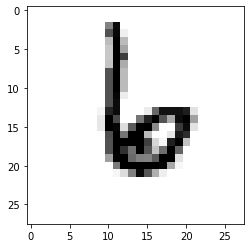

In [8]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

In [11]:
Y_single_data.dtype

torch.int64

In [15]:
type(Y_single_data.item())

int